# ランダムフォレストモデルでトレーニングする

In [ ]:
!pip install numpy scikit-learn joblib
!pip show scikit-learn

In [1]:
import pandas as pd

# 保存されたデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_scaled_features.csv'
data = pd.read_csv(data_path)

# 特徴量のリスト
features = data.columns.tolist()
print(features)


['市区町村コード', '最寄駅：距離（分）', '面積（㎡）', '建築年', '建ぺい率（％）', '容積率（％）', '取引時点', '取引価格（総額）_log', '取引年', '築年数', '取引月', '面積/築年数比', '駅距離_面積比', '容積率_建ぺい率比', '面積×容積率', '建築年×建ぺい率', 'エリア人気度スコア', '長期価格トレンド', '建築年スコア', '間取り_オープンフロア', '間取り_１ＤＫ', '間取り_１Ｋ', '間取り_１Ｋ＋Ｓ', '間取り_１ＬＤＫ', '間取り_１ＬＤＫ＋Ｓ', '間取り_１ＬＫ', '間取り_１Ｒ', '間取り_２ＤＫ', '間取り_２ＤＫ＋Ｓ', '間取り_２Ｋ', '間取り_２ＬＤＫ', '間取り_２ＬＤＫ＋Ｓ', '間取り_３ＤＫ', '間取り_３ＤＫ＋Ｓ', '間取り_３Ｋ', '間取り_３ＬＤＫ', '間取り_３ＬＤＫ＋Ｓ', '間取り_３ＬＫ', '間取り_３ＬＫ＋Ｓ', '間取り_４ＤＫ', '間取り_４Ｋ', '間取り_４ＬＤＫ', '間取り_４ＬＤＫ＋Ｓ', '間取り_５ＤＫ', '間取り_５Ｋ', '間取り_５ＬＤＫ', '間取り_６ＬＤＫ', '間取り_７ＤＫ', '建物の構造_木造', '建物の構造_鉄骨造', '建物の構造_ＲＣ', '建物の構造_ＲＣ、ブロック造', '建物の構造_ＲＣ、鉄骨造', '建物の構造_ＳＲＣ', '都市計画_商業', '都市計画_工業', '都市計画_工業専用', '都市計画_準住居', '都市計画_準工業', '都市計画_調整区域', '都市計画_近隣商業', '都市計画_都計外', '都市計画_非線引き', '都市計画_１中住専', '都市計画_１低住専', '都市計画_１種住居', '都市計画_２中住専', '都市計画_２低住専', '都市計画_２種住居']


## ランダムフォレストモデルをトレーニングする

Best parameters found: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation MAE: 0.0881
Mean Absolute Error (MAE): 0.0891
Mean Squared Error (MSE): 0.0151
R-squared (R2): 0.8643
Root Mean Squared Error (RMSE): 0.1227
Mean Actual Value: 7.104142905770904
Mean Absolute Percentage Error (MAPE): 1.27%
最適なランダムフォレストモデルが /Users/hayakawakazue/Downloads/second_apt_2024_summer/model/random_forest_0806_2.joblib に保存されました。


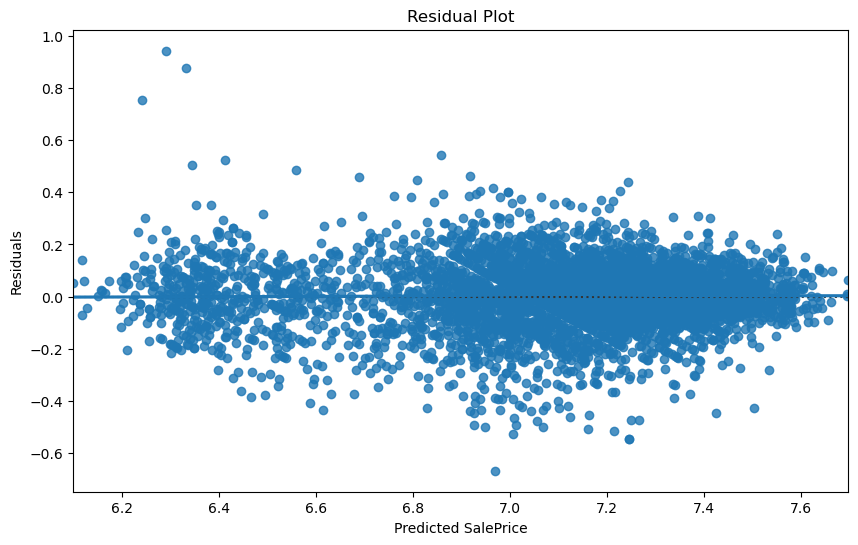

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 保存されたデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_scaled_features.csv'
data = pd.read_csv(data_path)

# 特徴量の選択
selected_features = [
    '長期価格トレンド', 'エリア人気度スコア', '市区町村コード', 
    '取引時点', '駅距離_面積比', '面積/築年数比', '建築年スコア', 
    '築年数', '面積×容積率', '建築年×建ぺい率'
]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['取引価格（総額）_log']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# データの前処理：nanを含む行を削除し、対応する y も削除
train_indices = X_train.dropna().index
X_train = X_train.loc[train_indices]
y_train = y_train.loc[train_indices]

test_indices = X_test.dropna().index
X_test = X_test.loc[test_indices]
y_test = y_test.loc[test_indices]

# ハイパーパラメータの候補を設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# ランダムフォレストモデルの定義
rf_model = RandomForestRegressor(random_state=29)

# グリッドサーチの設定
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)

# グリッドサーチの実行
rf_grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {rf_grid_search.best_params_}")
print(f"Best cross-validation MAE: {-rf_grid_search.best_score_:.4f}")

# 最適なモデルを取得
rf_best = rf_grid_search.best_estimator_

# テストデータを使った予測
y_pred = rf_best.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Actual Value: {mean_actual_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 最適なモデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/second_apt_2024_summer/model', 'random_forest_0806_2.joblib')
joblib.dump(rf_best, model_path)
print(f"最適なランダムフォレストモデルが {model_path} に保存されました。")

# 残差プロットの作成
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


# 過学習の有無を計算する

Training Mean Absolute Error (MAE): 0.0322
Training Mean Squared Error (MSE): 0.0020
Training R-squared (R2): 0.9818
Training Root Mean Squared Error (RMSE): 0.0451


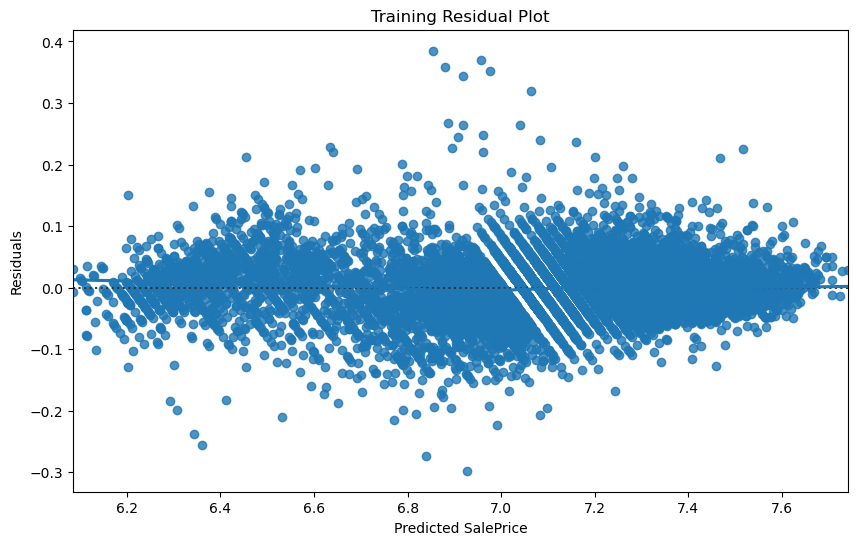

In [3]:
# トレーニングデータを使った予測
y_train_pred = rf_best.predict(X_train)

# トレーニングデータの評価指標の計算
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 結果の表示
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse:.4f}")

# 残差プロットの作成（トレーニングデータ）
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=(y_train - y_train_pred), lowess=True)
plt.title('Training Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


## クロスバリデーション

In [4]:
from sklearn.model_selection import cross_val_score

# クロスバリデーションの実施
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# 平均スコアの計算
mean_cv_score = -cv_scores.mean()

print(f"Cross-validation Mean Absolute Error (MAE): {mean_cv_score:.4f}")

Cross-validation Mean Absolute Error (MAE): 0.0881


## RandomizedSearchCV を使用してハイパーパラメータのチューニング

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 46}
Best cross-validation MAE: 0.0914
Mean Absolute Error (MAE): 0.0924
Mean Squared Error (MSE): 0.0160
R-squared (R2): 0.8559
Root Mean Squared Error (RMSE): 0.1264
Mean Actual Value: 7.104142905770904
Mean Absolute Percentage Error (MAPE): 1.32%
最適なランダムフォレストモデルが /Users/hayakawakazue/Downloads/second_apt_2024_summer/model/random_forest_0806_2.joblib に保存されました。


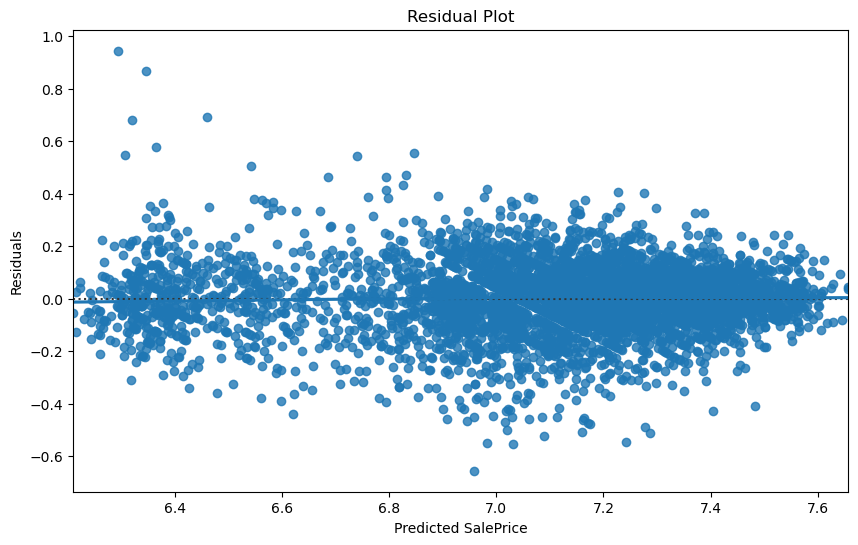

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# 保存されたデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_scaled_features.csv'
data = pd.read_csv(data_path)

# 特徴量の選択
selected_features = [
    '長期価格トレンド', 'エリア人気度スコア', '市区町村コード', 
    '取引時点', '駅距離_面積比', '面積/築年数比', '建築年スコア', 
    '築年数', '面積×容積率', '建築年×建ぺい率'
]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['取引価格（総額）_log']

# NaN 値の処理
X = X.dropna()
y = y.loc[X.index]

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# ランダムサーチの設定
param_dist = {
    'n_estimators': randint(40, 60),
    'max_depth': randint(10, 15),
    'min_samples_split': randint(15, 20),
    'min_samples_leaf': randint(6, 8),
    'max_features': ['sqrt']
}

# ランダムサーチモデルを定義する
rf_model = RandomForestRegressor(random_state=29)
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, random_state=29)

# ランダムサーチの実行
rf_random_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {rf_random_search.best_params_}")
print(f"Best cross-validation MAE: {-rf_random_search.best_score_:.4f}")

# 最適なモデルを取得
rf_best = rf_random_search.best_estimator_

# テストデータを使った予測
y_pred = rf_best.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# ゼロ除外
y_test_nonzero = y_test[y_test > 0]
y_pred_nonzero = y_pred[y_test > 0]
mape = mean_absolute_percentage_error(y_test_nonzero, y_pred_nonzero) * 100

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Actual Value: {mean_actual_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 最適なモデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/second_apt_2024_summer/model', 'random_forest_0806_2.joblib')
joblib.dump(rf_best, model_path)
print(f"最適なランダムフォレストモデルが {model_path} に保存されました。")

# 残差プロットの作成
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


## 過学習の計算

Training Mean Absolute Error (MAE): 0.0738
Training Mean Squared Error (MSE): 0.0104
Training R-squared (R2): 0.9068
Training Root Mean Squared Error (RMSE): 0.1022


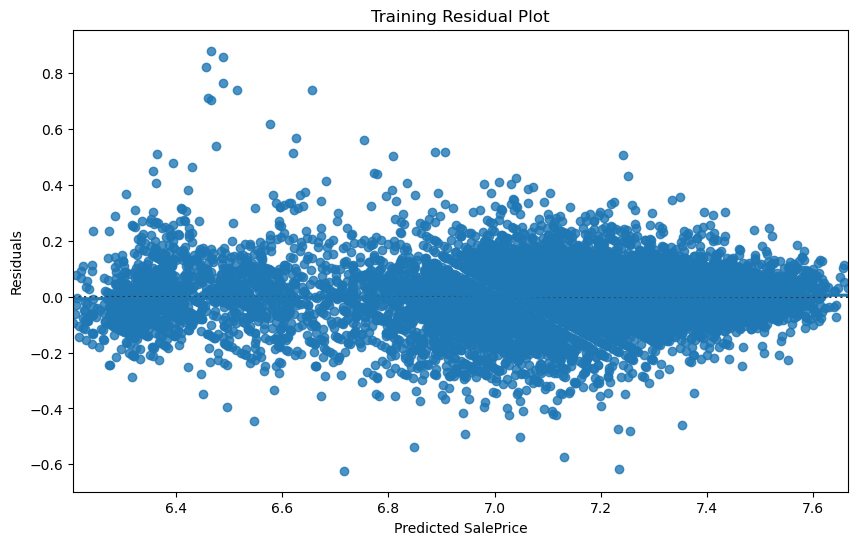

In [6]:
# トレーニングデータを使った予測
y_train_pred = rf_best.predict(X_train)

# トレーニングデータの評価指標の計算
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 結果の表示
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse:.4f}")

# 残差プロットの作成（トレーニングデータ）
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=(y_train - y_train_pred), lowess=True)
plt.title('Training Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

## クロスバリデーション

In [7]:
from sklearn.model_selection import cross_val_score

# クロスバリデーションの実施
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# 平均スコアの計算
mean_cv_score = -cv_scores.mean()

print(f"Cross-validation Mean Absolute Error (MAE): {mean_cv_score:.4f}")

Cross-validation Mean Absolute Error (MAE): 0.0914
